### Necessary Library

In [5]:
# Preprocessing Module
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
pd.set_option('display.max_columns', 50)

# Visualization Module
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Dimensionality Reduction Module
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model Training Module
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

#Miscellaneous
import os, sys
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Data Preprocessing by dropping NAN Values

In [ ]:
df=pd.read_csv('/Users/armanruzgar/Documents/Dev/cs4950/csv_result-chronic_kidney_disease.csv') # Read the dataset from the data path
df

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
columns = ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'] # Rename the column due to formatting issue
df.columns = columns

categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'] # Categorical features column
numerical_features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'] # Numerical_features column
target = 'class' # Target column
assert(len(categorical_features)+len(numerical_features) == df.shape[1]-2) # check for mismatch of number of columns

In [ ]:
df = df.replace('?', np.nan) # Replace the ? value with NAN value
df.isna().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [ ]:
# Drop out NAN Values
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,10,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,12,63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,15,68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,21,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,396,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
154,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
155,398,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
156,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
# Fill the missing numerical value with it's median value
for col in numerical_features:
  df[col] = df[col].fillna(df[col].median())

df[numerical_features].isna().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wbcc    0
rbcc    0
dtype: int64

In [ ]:
# Fill the missing categorical value with it's most frequent value
for col in categorical_features:
  df[col] = df[col].fillna(df[col].value_counts().index[0])

df[categorical_features].isna().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [ ]:
df[numerical_features] = df[numerical_features].astype(float) # Convert the datatype of the numerical column into float types

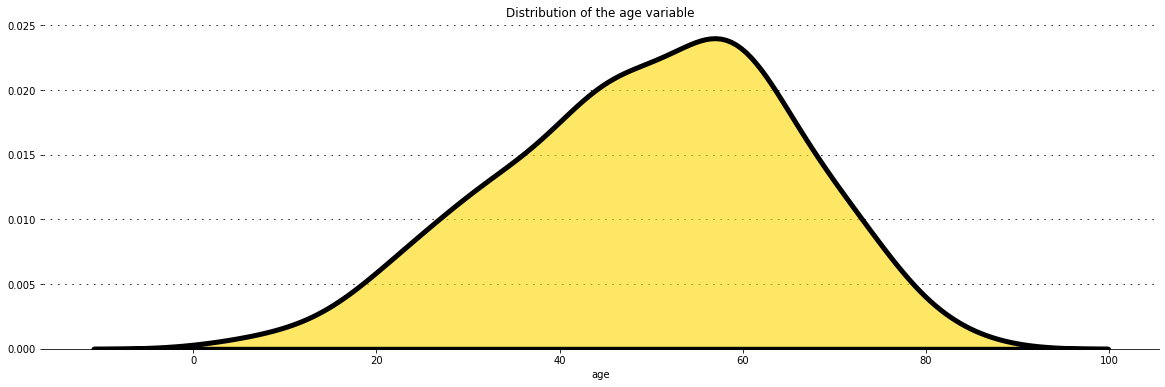

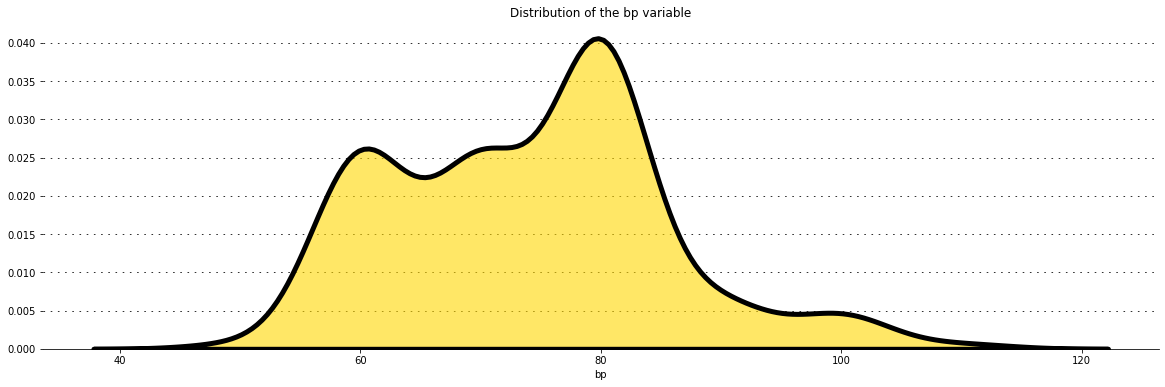

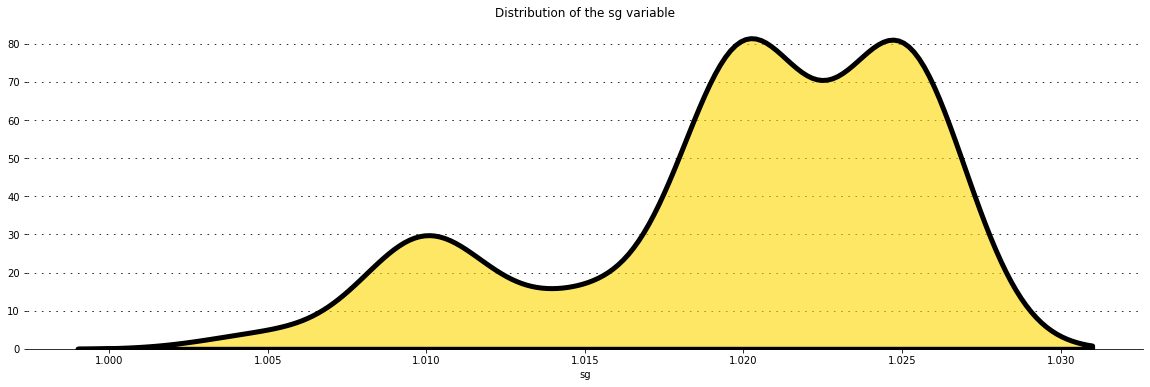

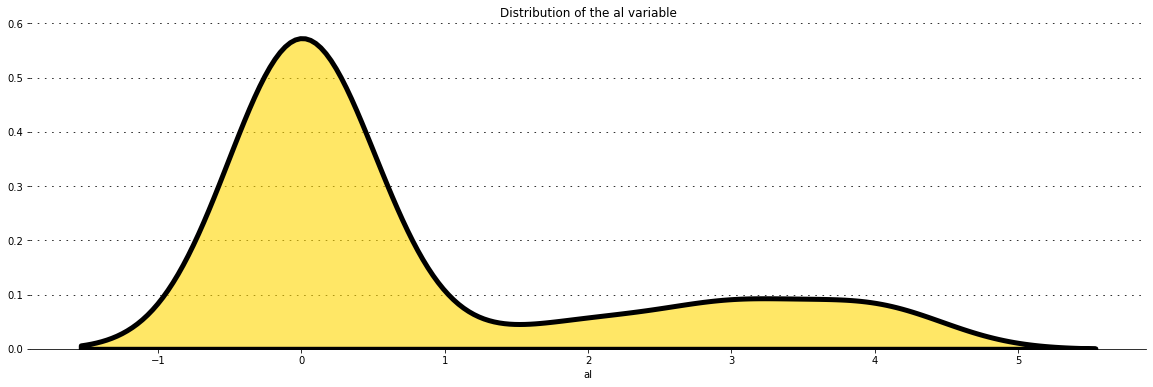

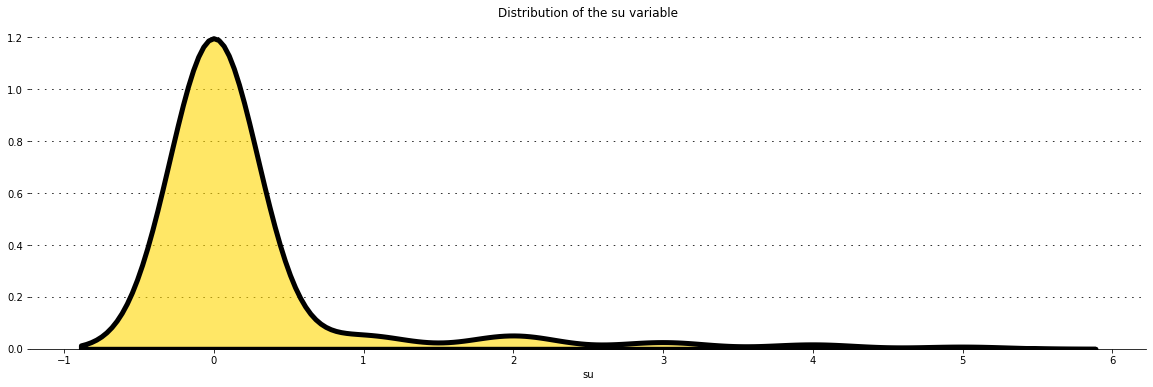

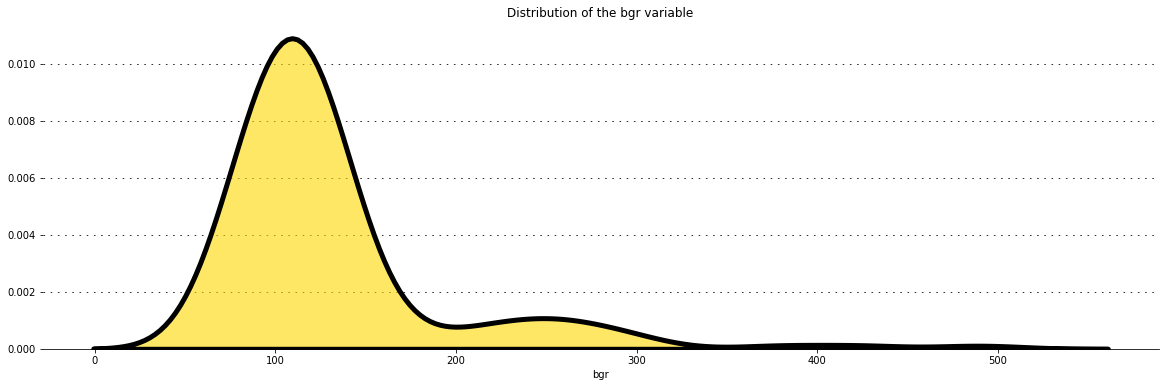

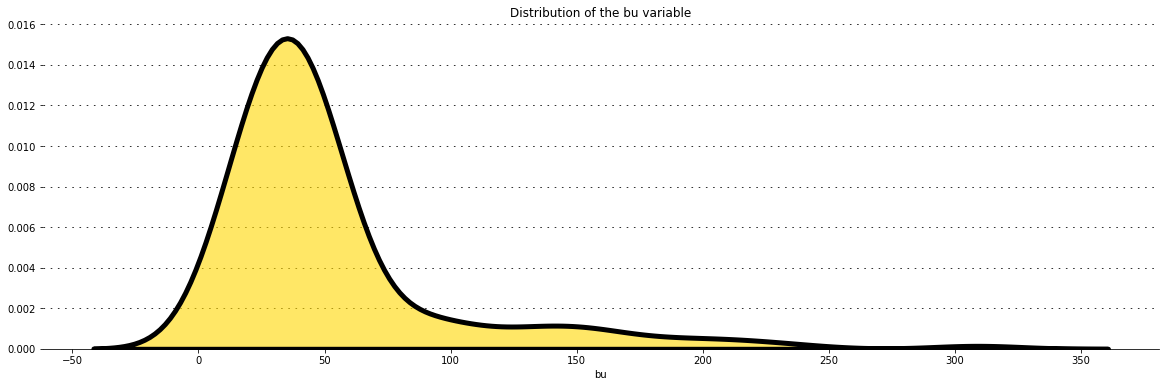

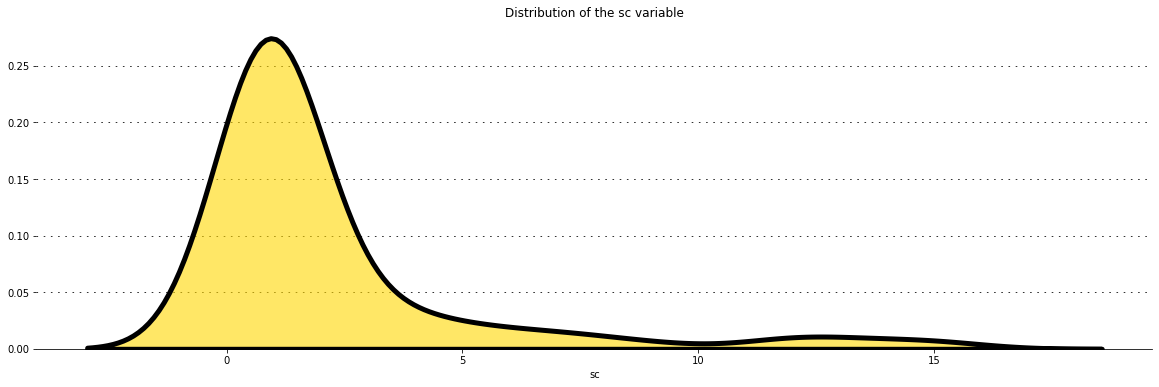

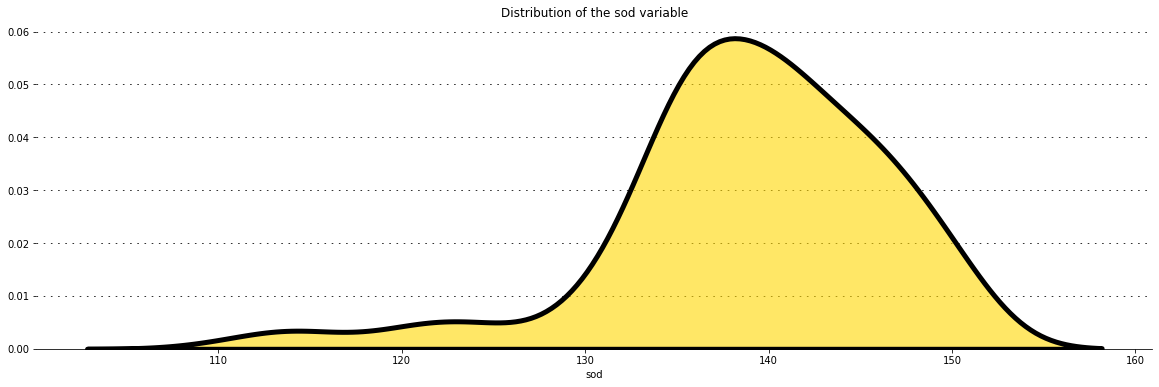

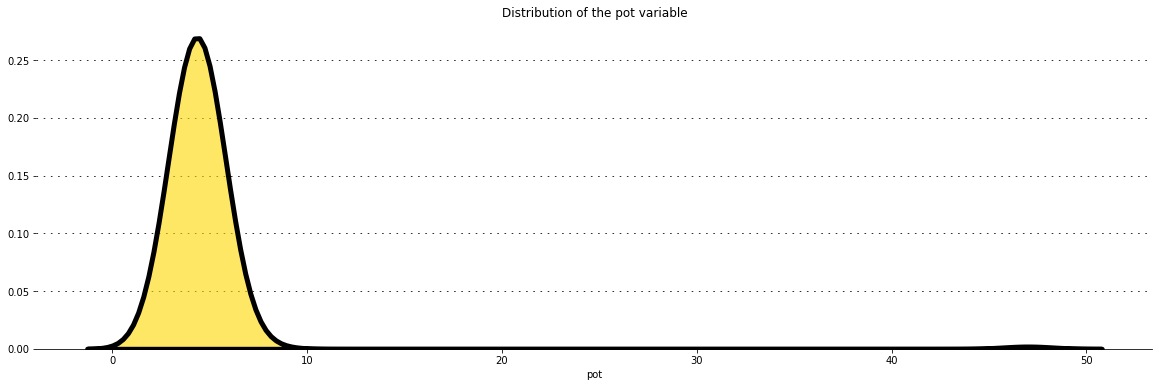

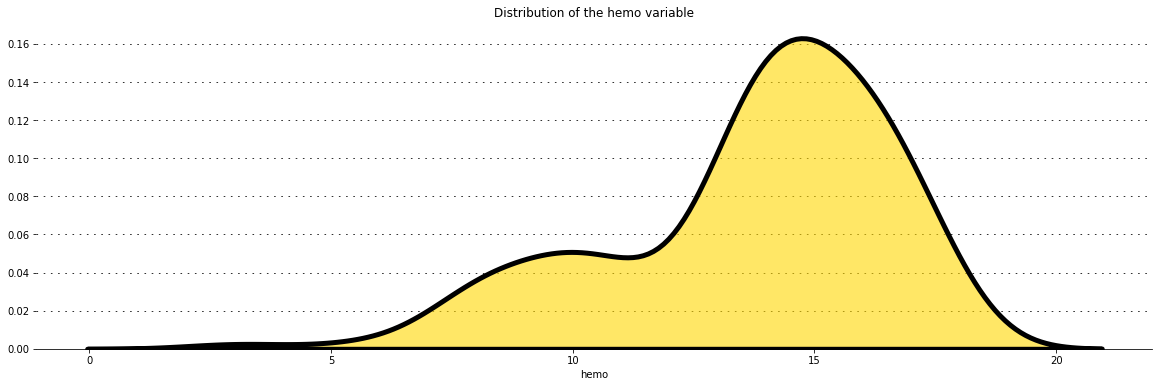

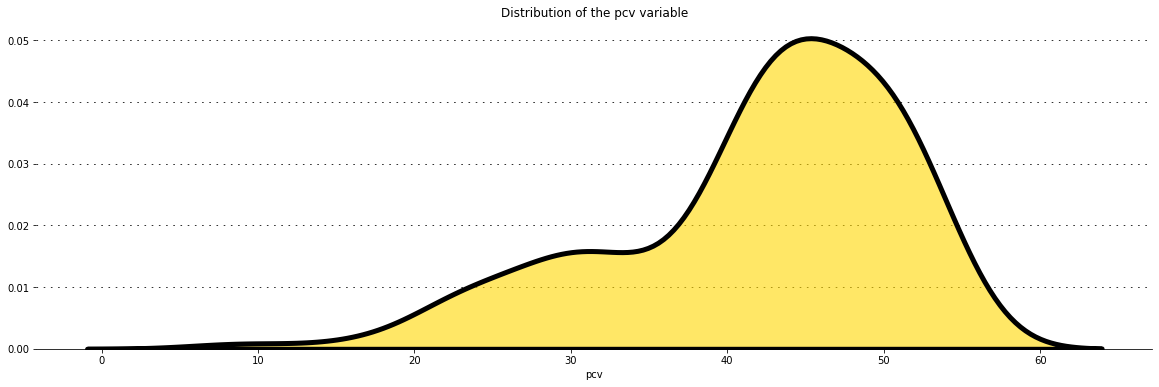

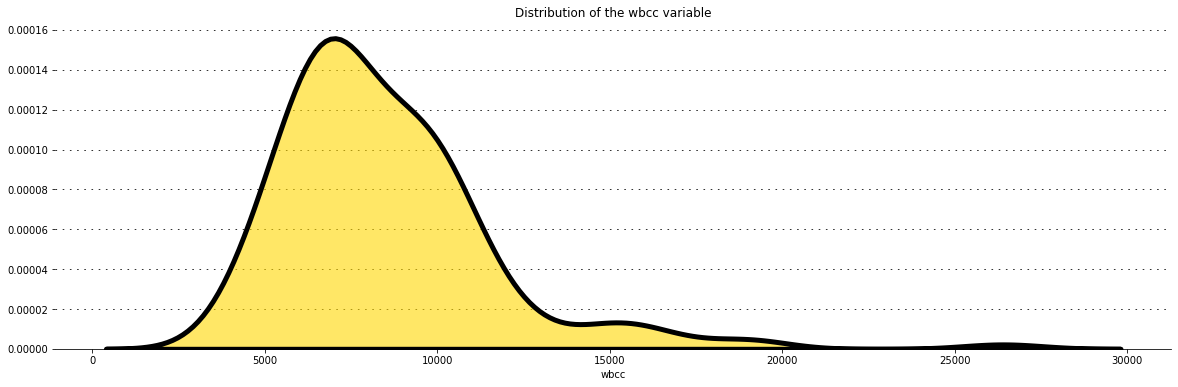

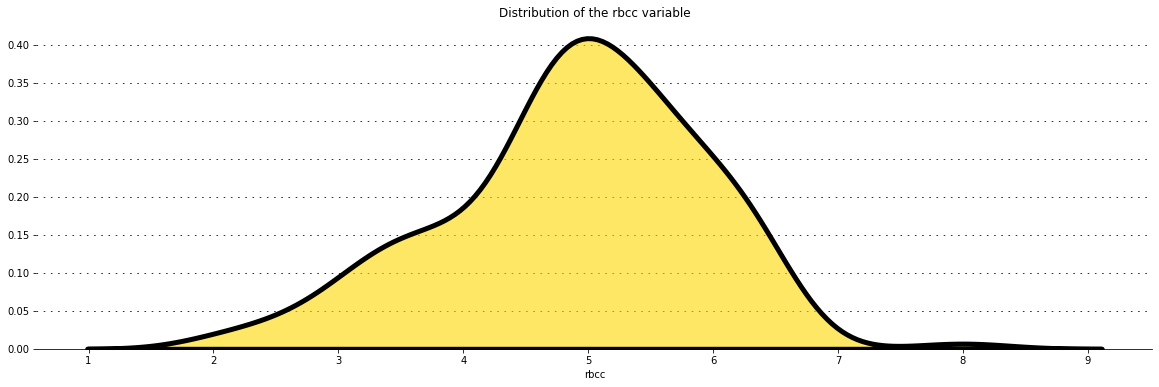

In [ ]:
# Visualization of numerical features
i = 0
for col in numerical_features:
  fig=plt.figure(figsize=(20, 6),facecolor='white')
  grid = fig.add_gridspec(1,1)
  ax = fig.add_subplot(grid[0,0])  
  sns.kdeplot(x=df[col],ax=ax,shade=True, color='gold', alpha=0.6,zorder=3,linewidth=5,edgecolor='black').set(title = f'Distribution of the {col} variable')
  ax.set_ylabel('')
  ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
  
  for dir in ['top','right','left']:
      ax.spines[dir].set_visible(False)
        
  i += 1


In [ ]:
# Visualization of categorical features
fig = make_subplots(
    rows=5, cols=2, subplot_titles=("rbc", "pc",
                                    "pcc","ba",
                                    "htn", "dm",
                                    'cad', 'appet',
                                    'pe', 'ane'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

c = 0
for col in categorical_features:
  fig.add_trace(go.Pie(labels=np.array(df[col].value_counts().index),
                     values=[x for x in df[col].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
                     row=c//2+1, col=c%2+1)
  c += 1
  
fig.update_layout(height=2500, font=dict(size=14), showlegend=False)
fig.show()

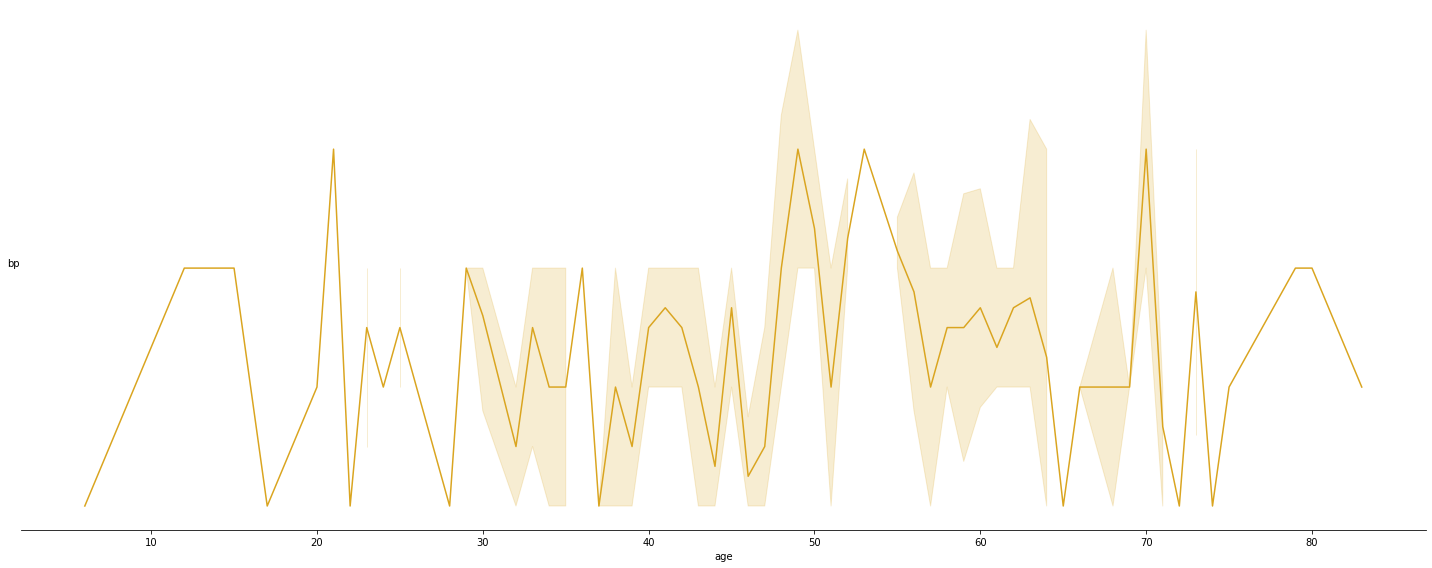

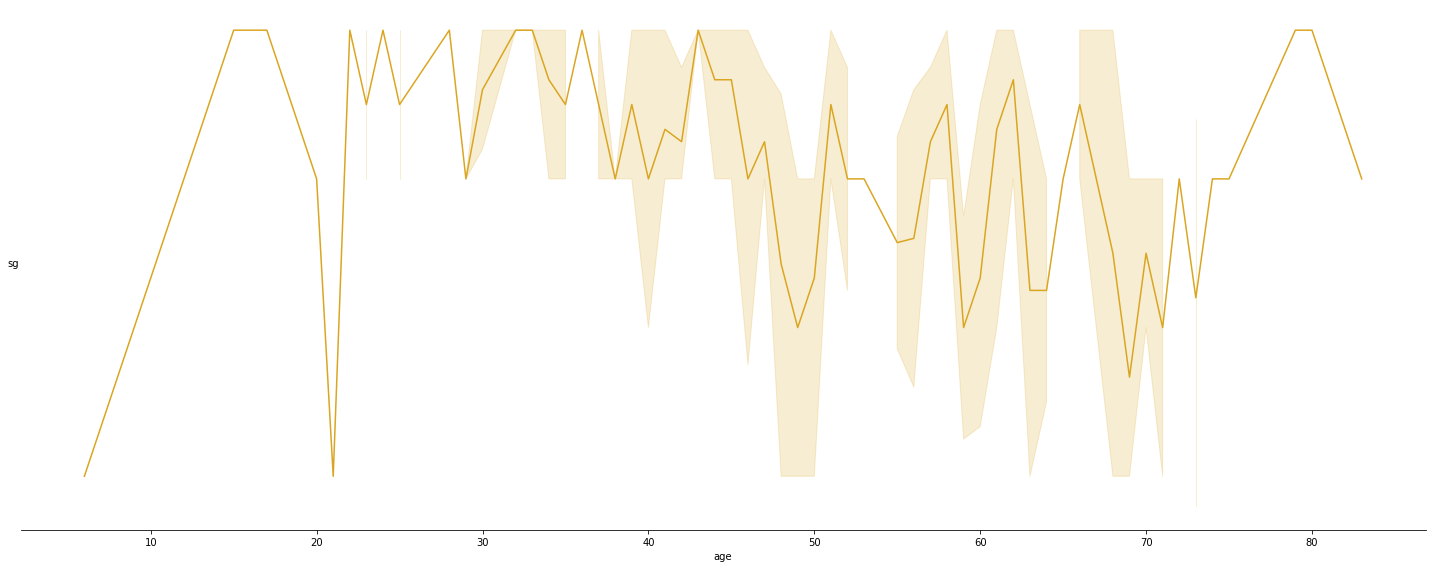

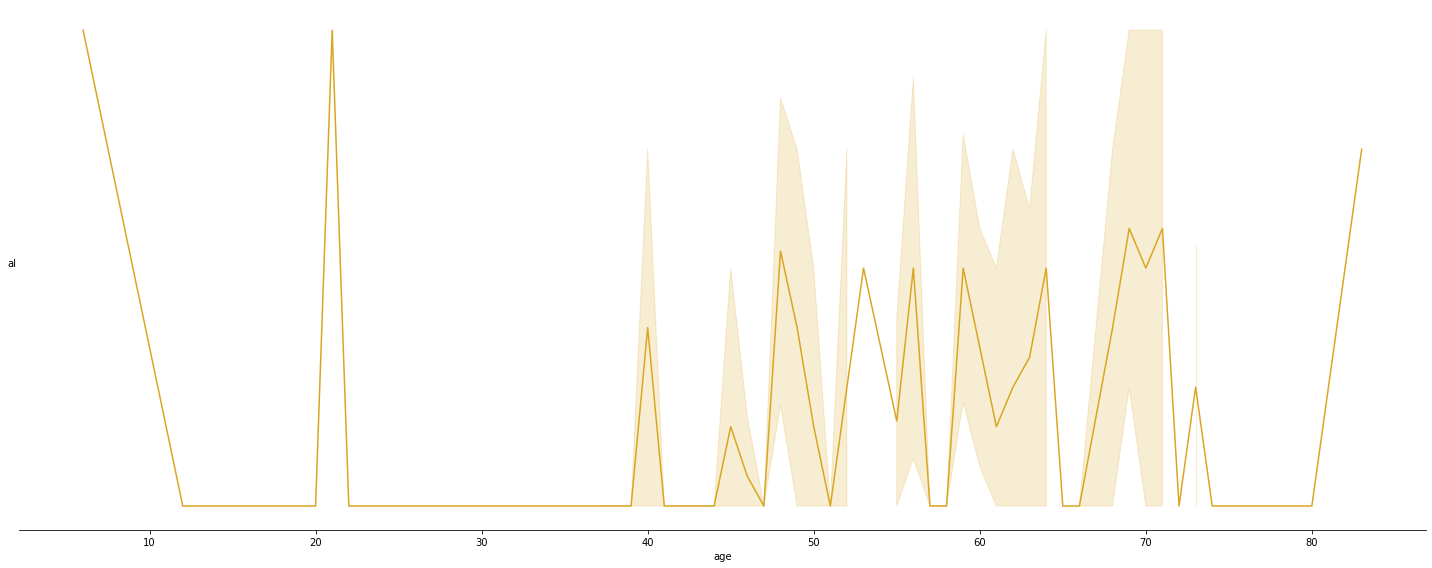

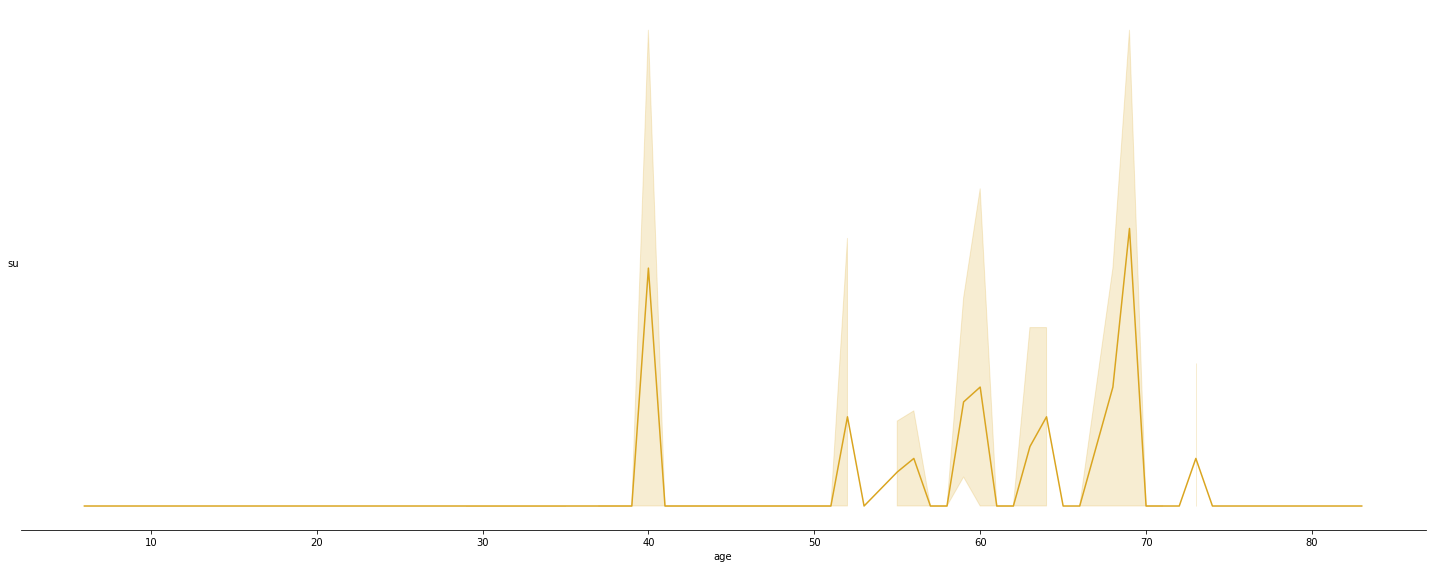

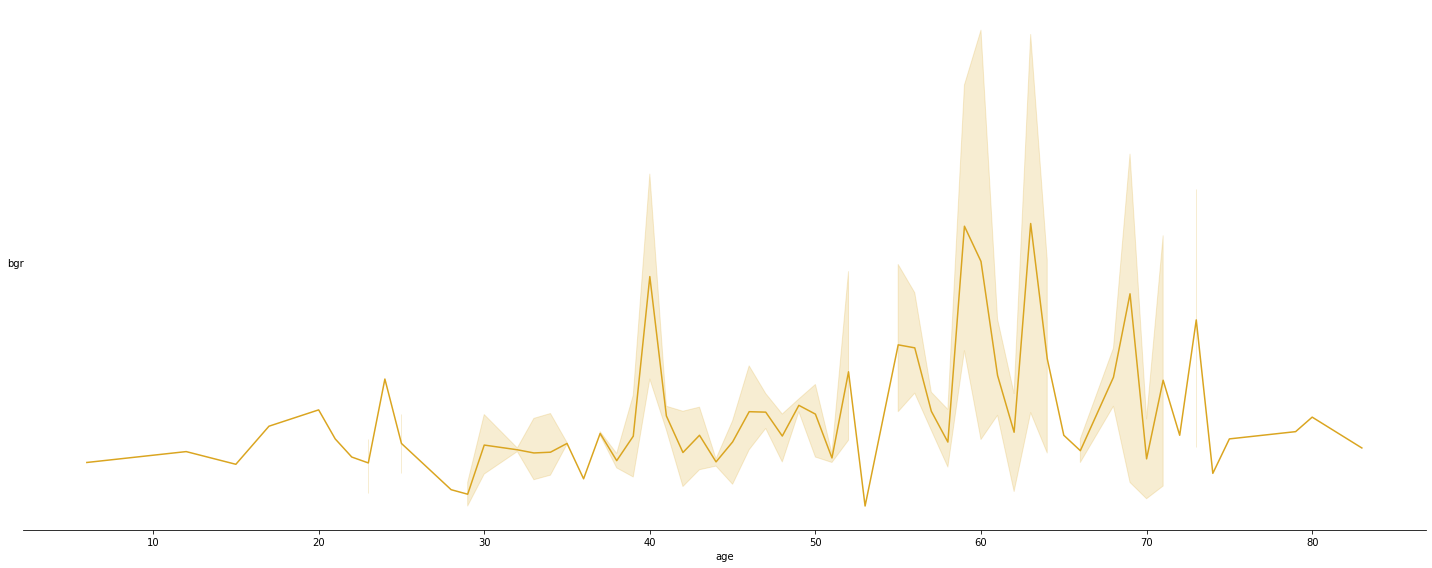

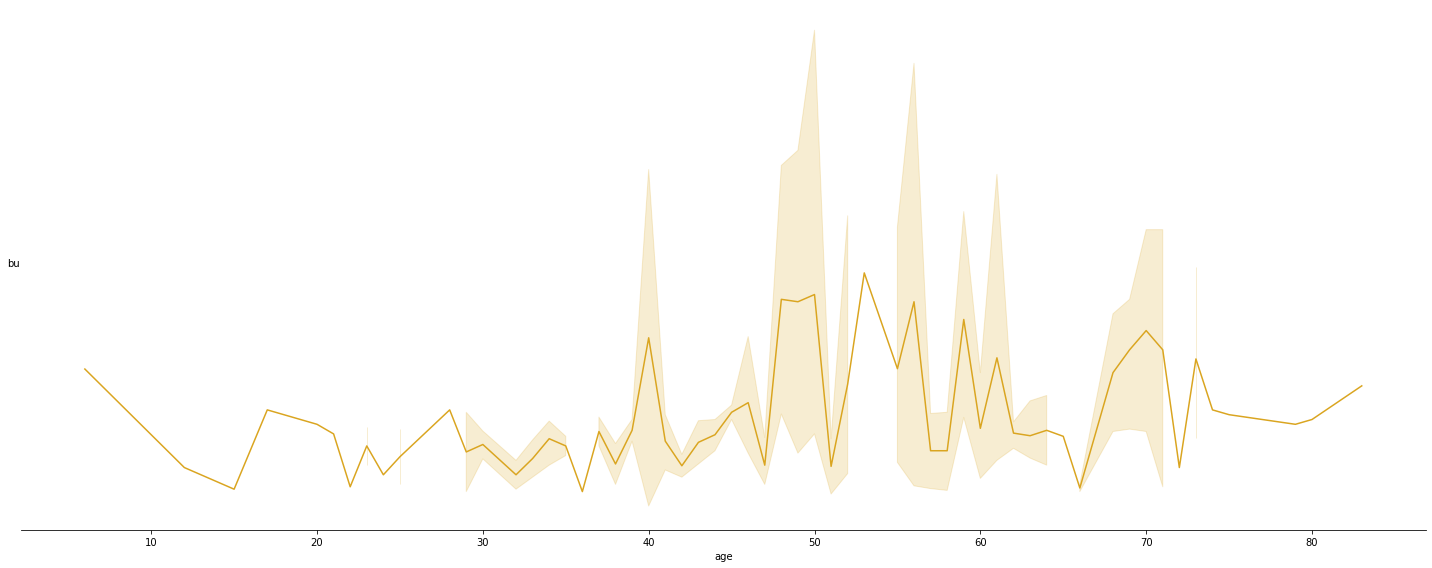

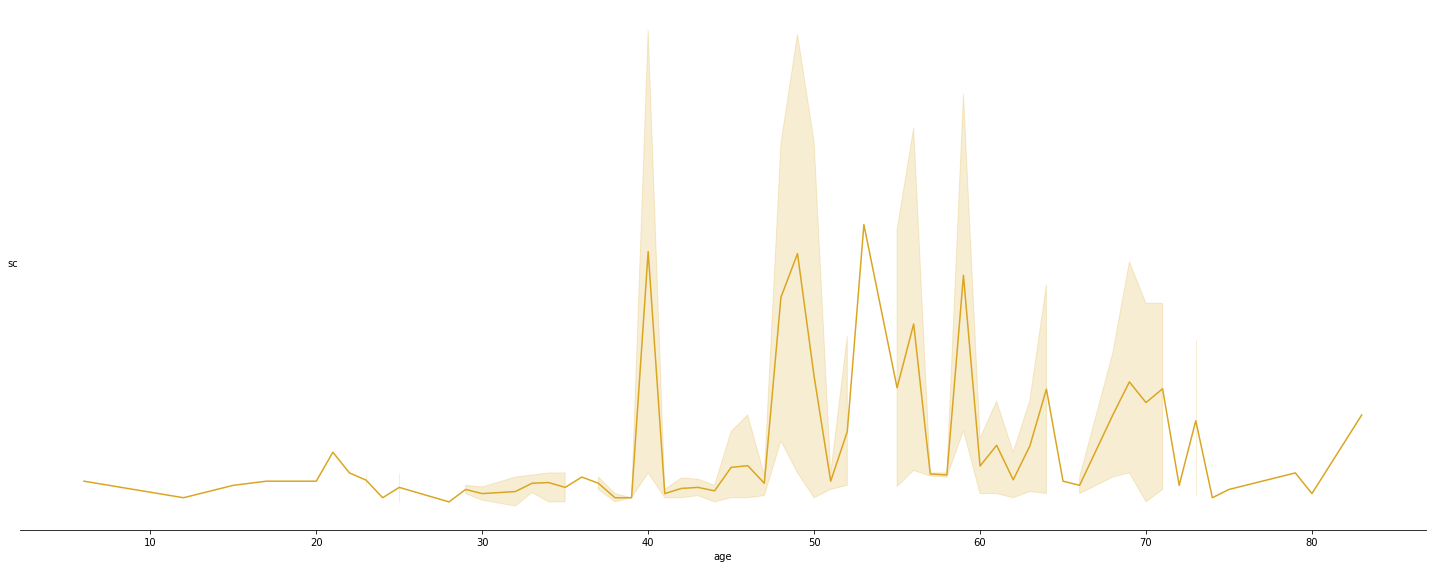

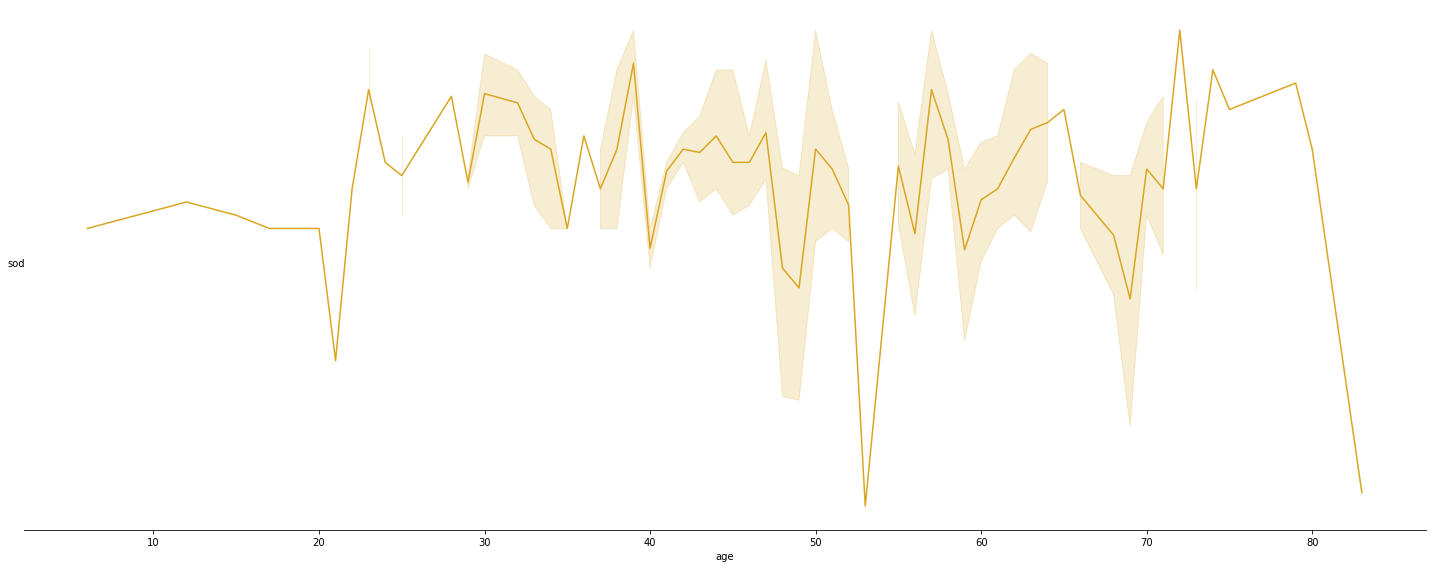

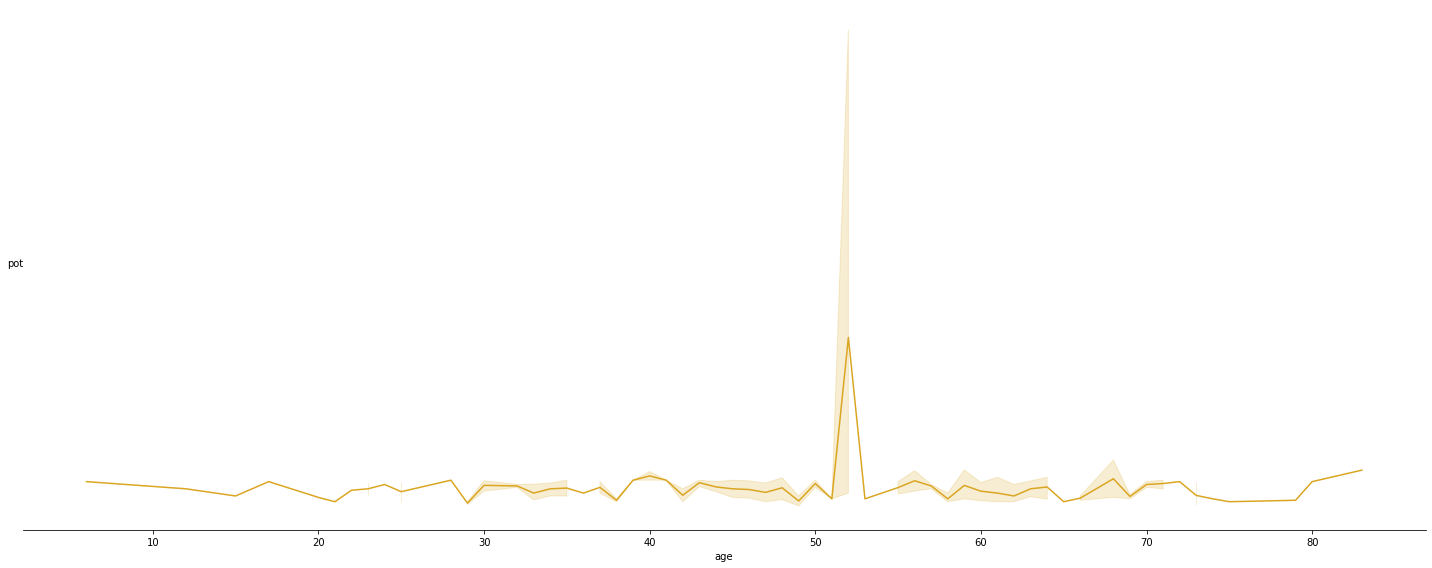

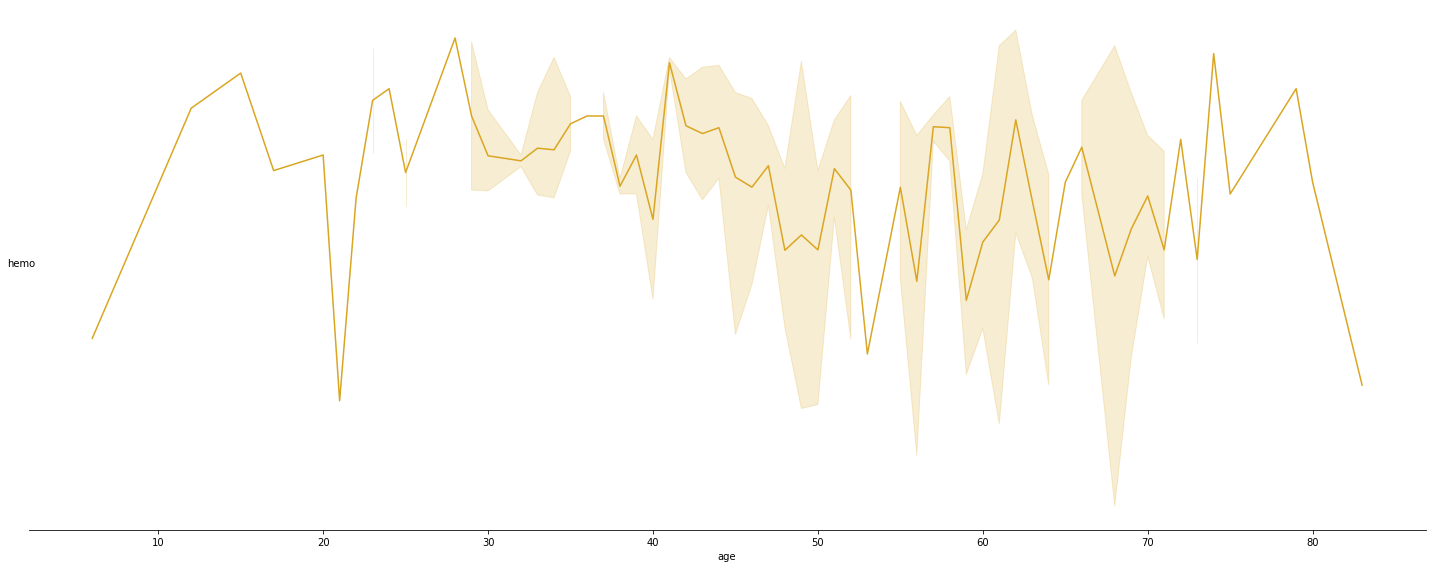

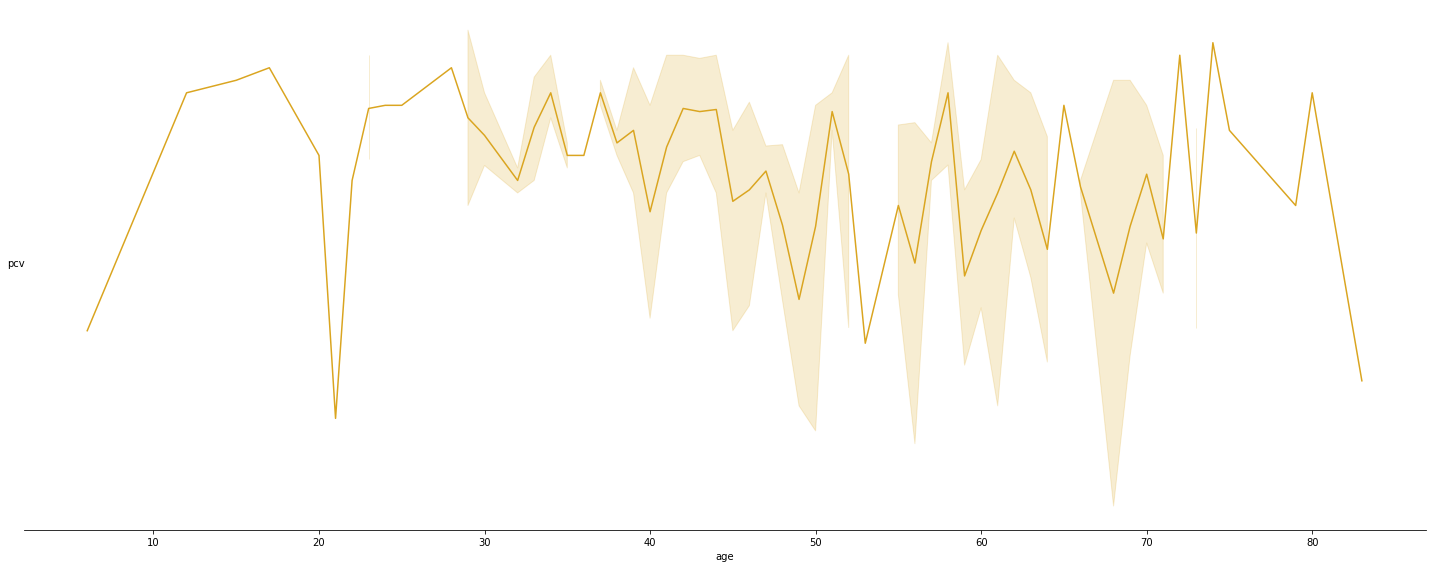

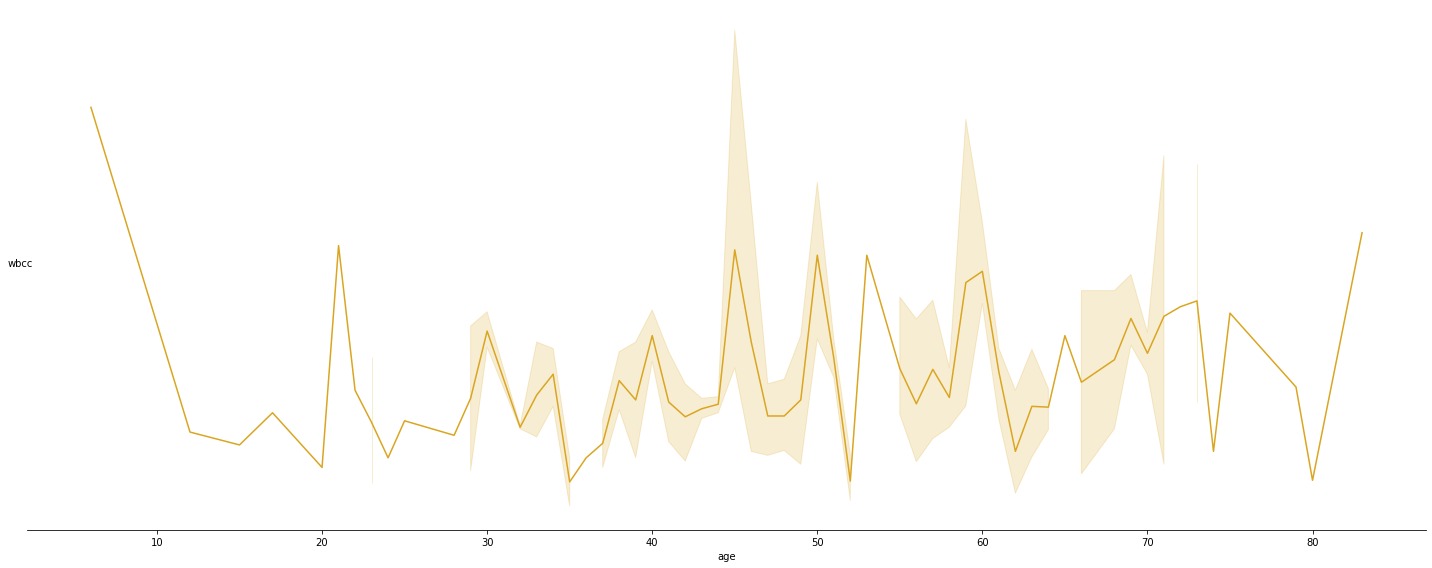

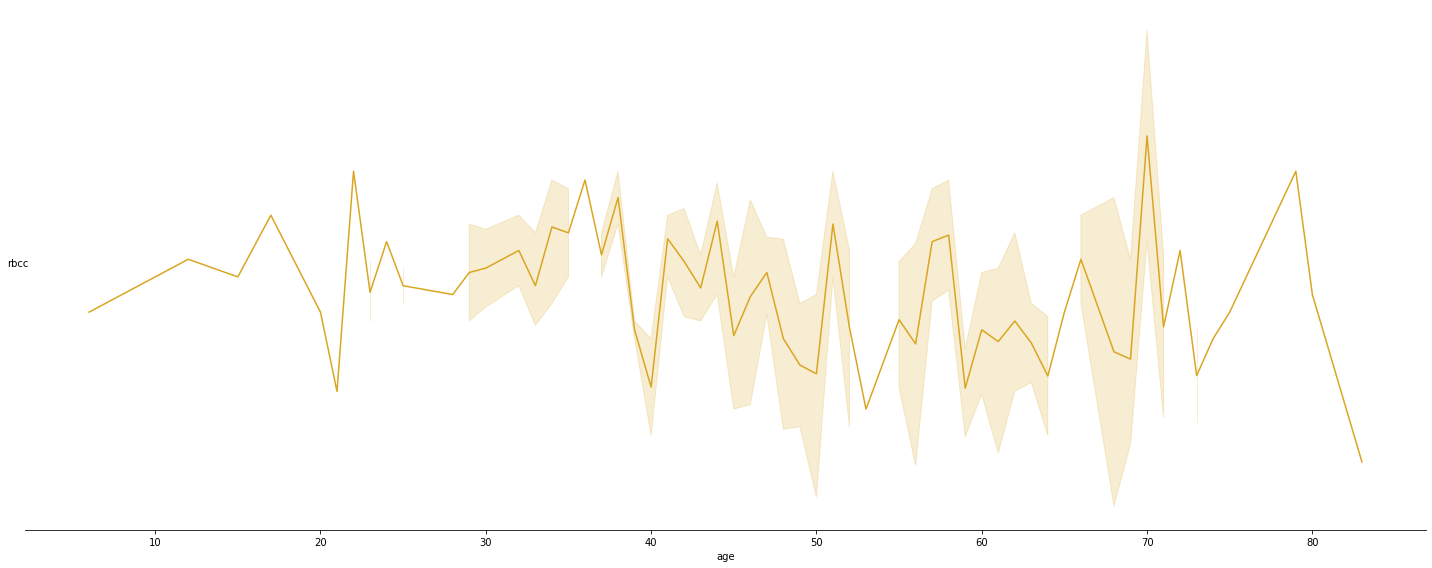

In [ ]:
# Visualize the relationship of age variable with other numerical features
for col in numerical_features[1:]:
  fig=plt.figure(figsize=(20,8),facecolor='white')
  gs=fig.add_gridspec(1,1)
  ax=fig.add_subplot(gs[0,0])
  sns.lineplot(data=df,x='age',y=col,ax=ax,color='goldenrod')
  # sns.scatterplot(data=rain,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='salmon')
  ax.set_ylabel(col).set_rotation(0)
  ax.set_yticklabels('')
  ax.tick_params(axis='y',length=0)
      
  for dir in ['top','right','left']:
      ax.spines[dir].set_visible(False)
      
  plt.tight_layout()
  plt.show()

In [ ]:
corr=df.corr()
corr

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
id,1.000000,-0.236508,-0.282317,0.676958,-0.745822,-0.331072,-0.449157,-0.521873,-0.523525,0.553574,-0.136201,0.693769,0.712855,-0.306113,0.627569
age,-0.236508,1.000000,0.079712,-0.277303,0.253380,0.207711,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645,-0.235116,0.153132,-0.242235
bp,-0.282317,0.079712,1.000000,-0.198897,0.322507,0.243828,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365,-0.353504,0.008274,-0.228533
sg,0.676958,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.544781,-0.545319,-0.563122,0.539285,-0.075057,0.682086,0.678472,-0.288930,0.619092
al,-0.745822,0.253380,0.322507,-0.712331,1.000000,0.521448,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745,-0.775528,0.314574,-0.640099
su,-0.331072,0.207711,0.243828,-0.448477,0.521448,1.000000,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511,-0.404821,0.201000,-0.377726
bgr,-0.449157,0.301915,0.190113,-0.544781,0.518123,0.730050,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158,-0.443818,0.212093,-0.418085
bu,-0.521873,0.190636,0.316287,-0.545319,0.661940,0.312259,0.326496,1.000000,0.896094,-0.492778,0.245427,-0.712196,-0.706582,0.128961,-0.621456
sc,-0.523525,0.189721,0.386551,-0.563122,0.702889,0.347196,0.331284,0.896094,1.000000,-0.532575,0.141896,-0.723937,-0.726187,0.123953,-0.639021
sod,0.553574,-0.102933,-0.224710,0.539285,-0.599334,-0.242491,-0.284968,-0.492778,-0.532575,1.000000,-0.051037,0.583001,0.570045,-0.176238,0.465125


In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
1,10,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
2,12,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
3,15,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
4,21,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,396,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
154,397,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
155,398,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
156,399,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
# Encode the categrocial features
for col in categorical_features:
  df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# Mapping the output label as 1 and 0
mapping = dict(zip(df[target].unique(), [1,0]))
df[target] = df[target].map(mapping)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,4,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
1,10,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1,1,0,1,0,1,1
2,12,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1,1,0,1,1,0,1
3,15,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1,1,1,1,1,0,1
4,21,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,396,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,0
154,397,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,0
155,398,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,0
156,399,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,0


In [ ]:
df.isna().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
# Prepare as input-output format for training
df = df.drop(['id'], axis = 1)
X = df.drop(target, axis = 1)
y = df[target]
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1,1,0,1,0,1
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1,1,0,1,1,0
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1,1,1,1,1,0
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
154,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
155,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
156,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [ ]:
# Normalize the data
X = StandardScaler().fit_transform(X)
# MiMaxScaling (-1 to 1) range
X = MinMaxScaler().fit_transform(X)

In [ ]:
# Stratified Random split with test size 20 %
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y)

In [ ]:
# Save the dataframe
df.to_pickle('/Users/armanruzgar/Documents/Dev/cs4950/df(drop).pkl', compression  = 'gzip')

### Data Preprocessing by handling missing value

In [7]:

df=pd.read_csv('/Users/armanruzgar/Documents/Dev/cs4950/csv_result-chronic_kidney_disease.csv') # Read the dataset from the data path
df

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
columns = ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'] # Rename the column due to formatting issue
df.columns = columns

categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'] # Categorical features column
numerical_features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'] # Numerical_features column
target = 'class' # Target column
assert(len(categorical_features)+len(numerical_features) == df.shape[1]-2) # check for mismatch of number of columns

In [9]:
df = df.replace('?', np.nan) # Replace the ? value with NAN value
df.isna().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [10]:
# Fill the missing numerical value with it's median value
for col in numerical_features:
  df[col] = df[col].fillna(df[col].median())

df[numerical_features].isna().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wbcc    0
rbcc    0
dtype: int64

In [11]:
# Fill the missing categorical value with it's most frequent value
for col in categorical_features:
  df[col] = df[col].fillna(df[col].value_counts().index[0])

df[categorical_features].isna().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [12]:
df[numerical_features] = df[numerical_features].astype(float) # Convert the datatype of the numerical column into float types
df.shape

(400, 26)

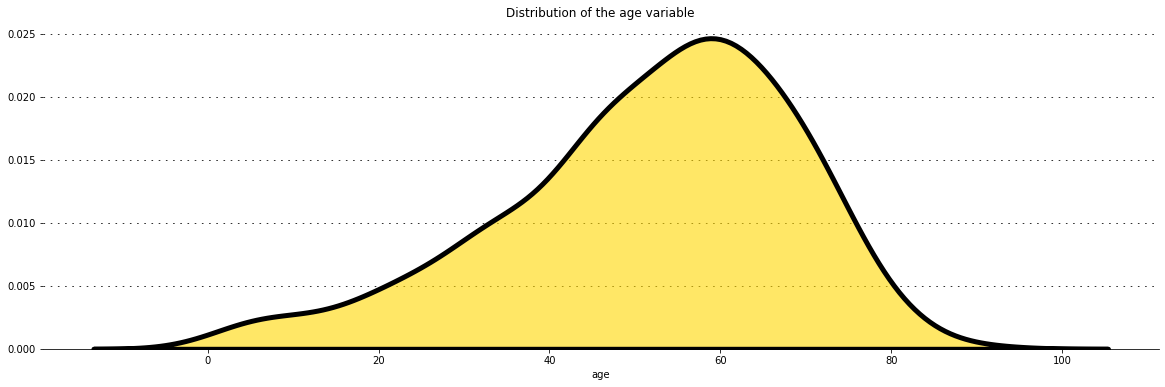

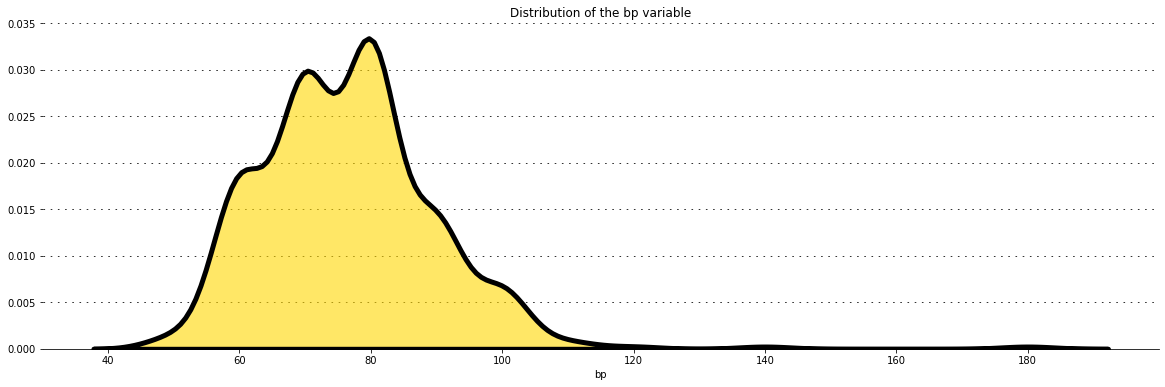

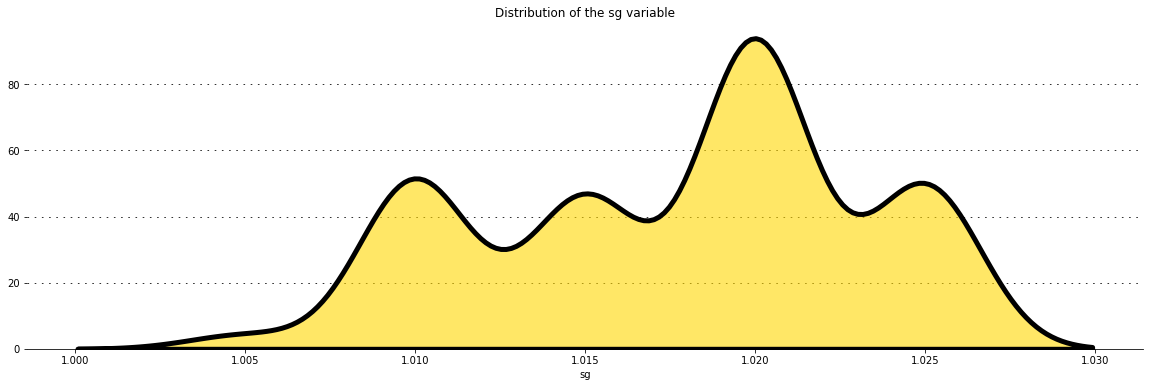

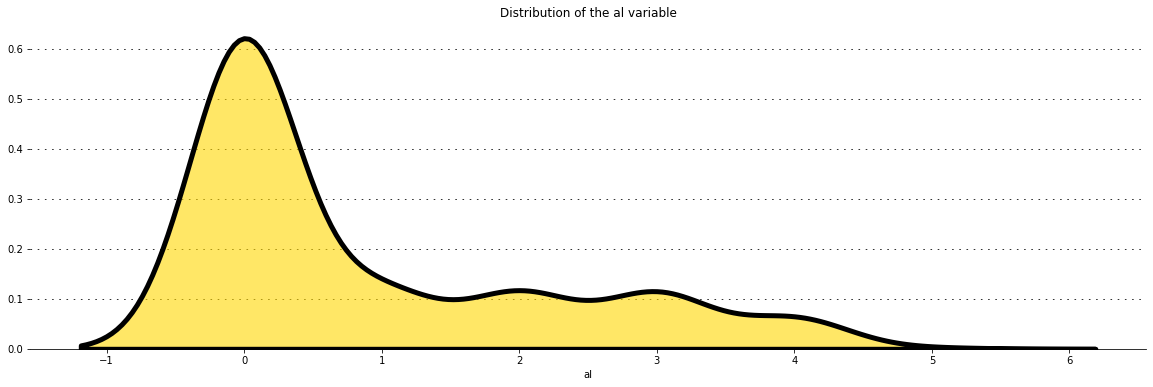

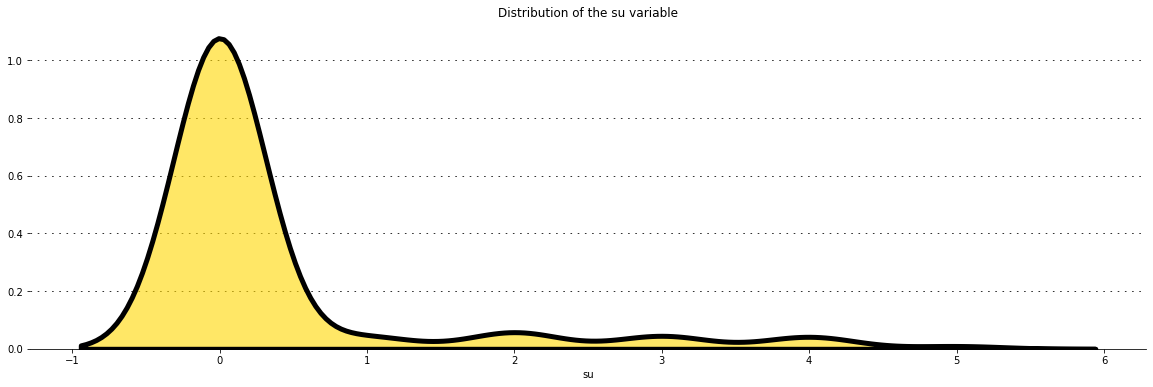

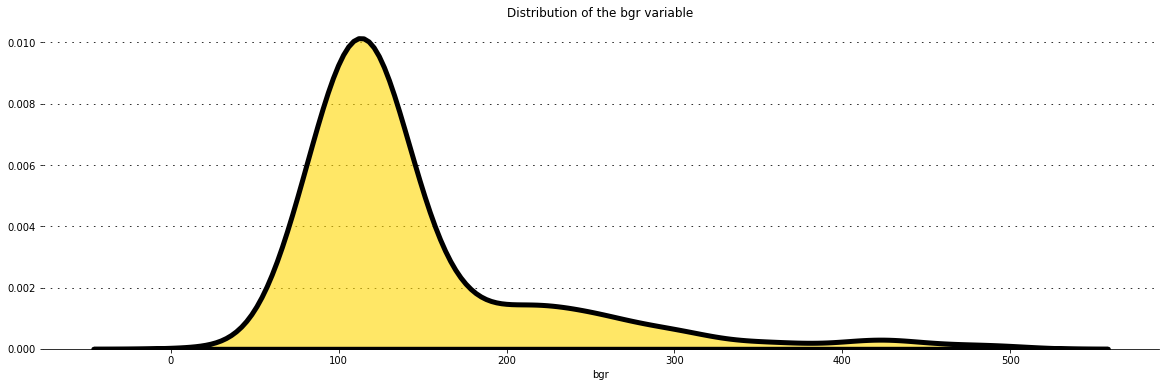

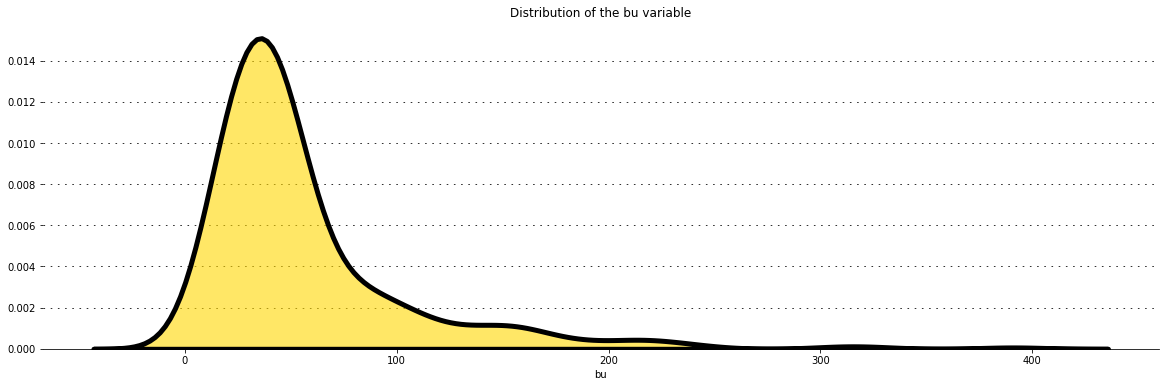

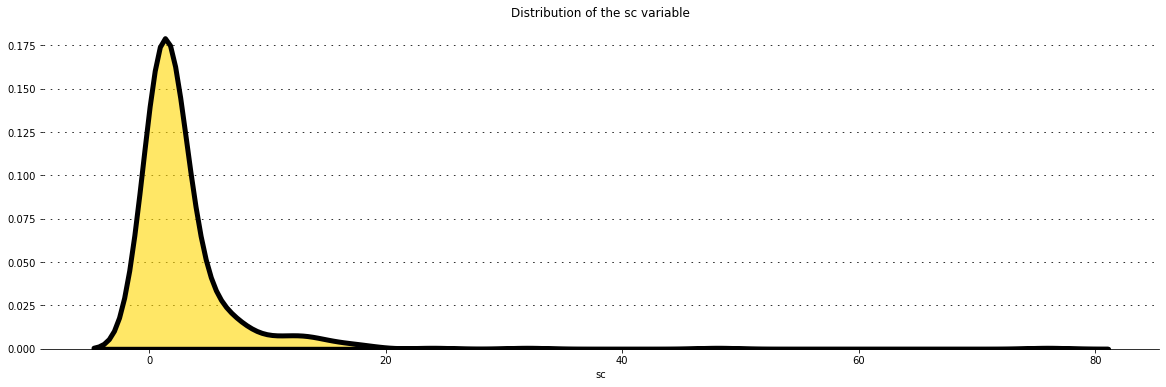

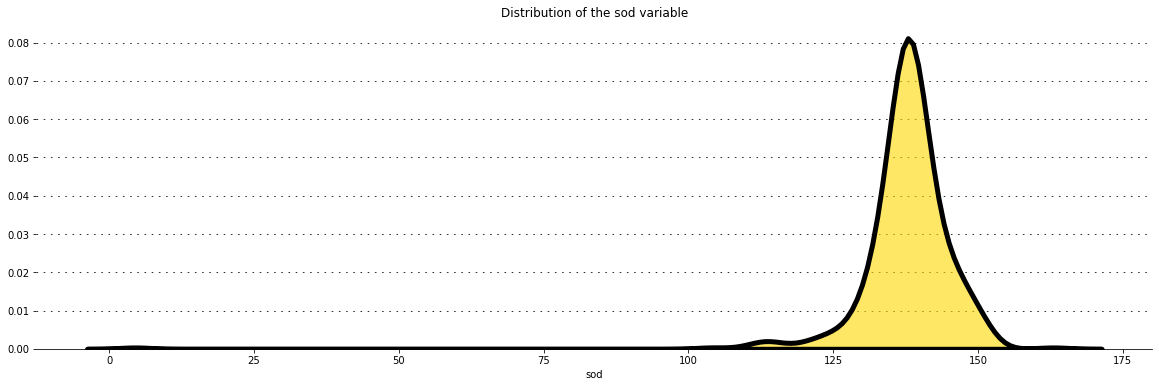

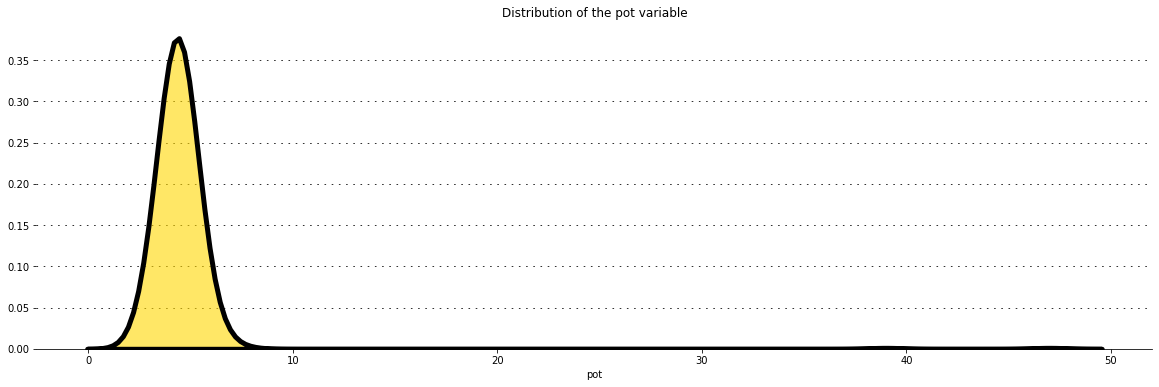

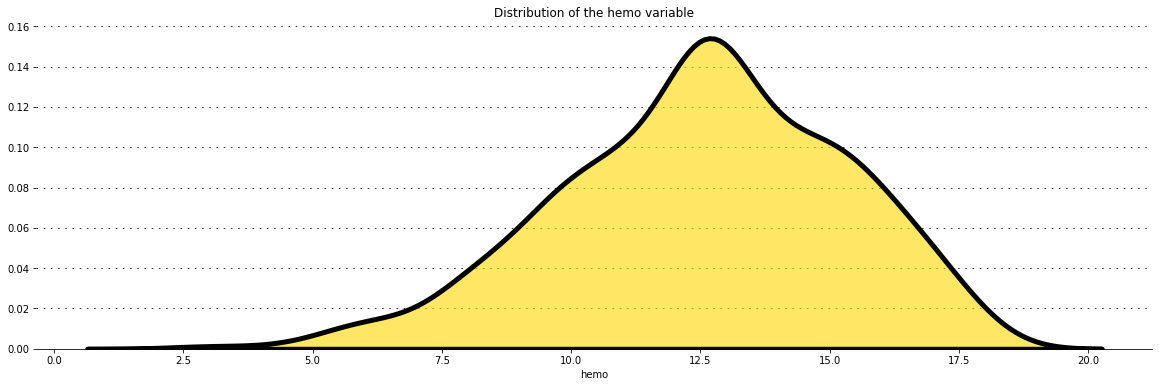

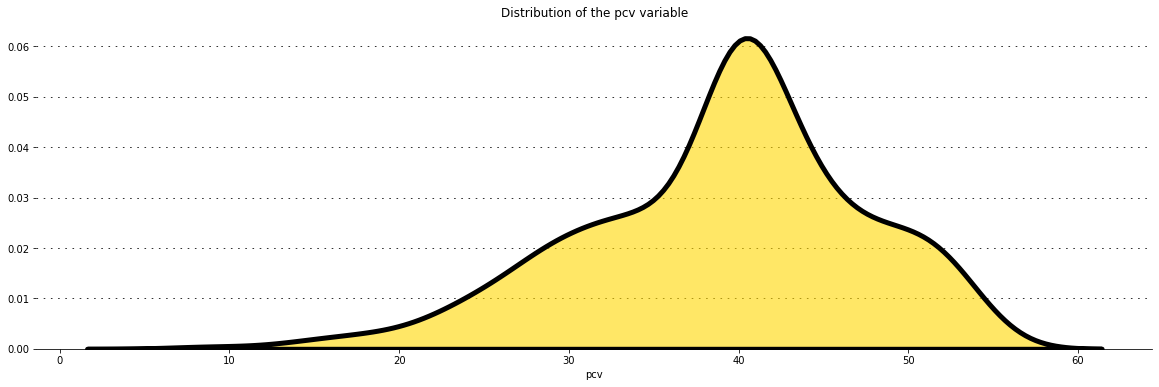

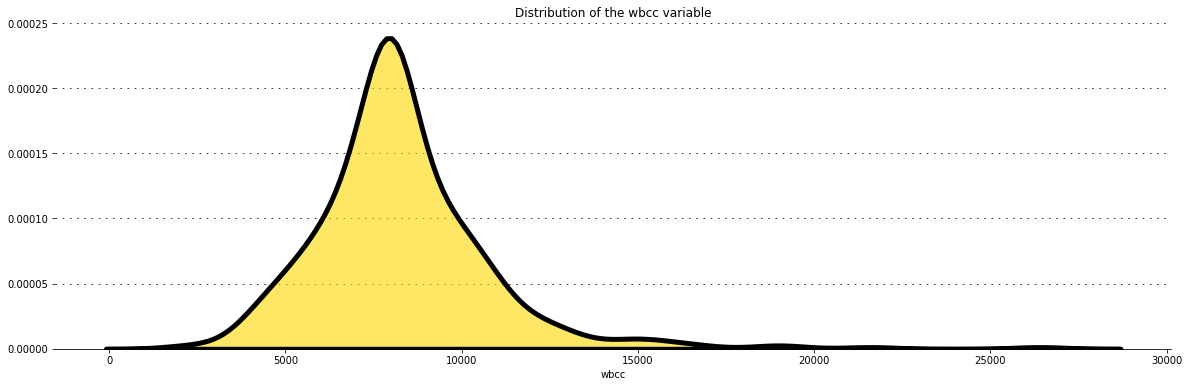

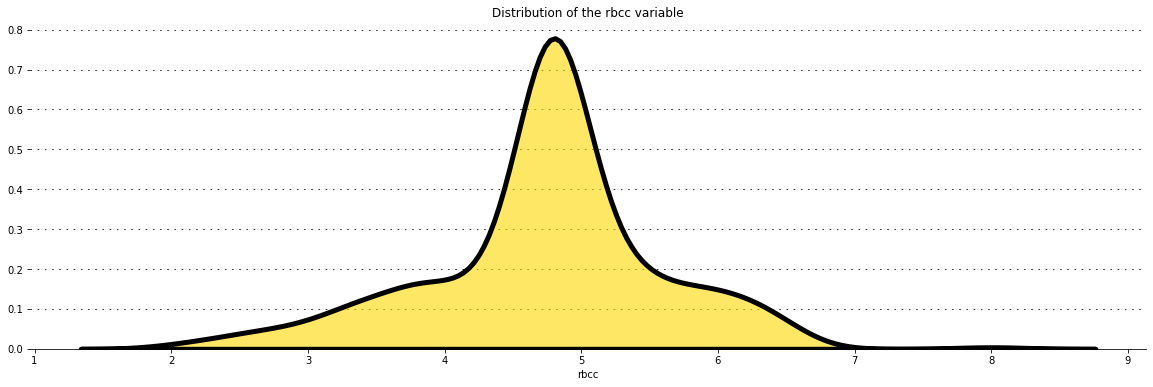

In [13]:
# Visualization of numerical features
i = 0
for col in numerical_features:
  fig=plt.figure(figsize=(20, 6),facecolor='white')
  grid = fig.add_gridspec(1,1)
  ax = fig.add_subplot(grid[0,0])  
  sns.kdeplot(x=df[col],ax=ax,shade=True, color='gold', alpha=0.6,zorder=3,linewidth=5,edgecolor='black').set(title = f'Distribution of the {col} variable')
  ax.set_ylabel('')
  ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
  
  for dir in ['top','right','left']:
      ax.spines[dir].set_visible(False)
        
  i += 1


In [14]:
# Visualization of categorical features
fig = make_subplots(
    rows=5, cols=2, subplot_titles=("rbc", "pc",
                                    "pcc","ba",
                                    "htn", "dm",
                                    'cad', 'appet',
                                    'pe', 'ane'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

c = 0
for col in categorical_features:
  fig.add_trace(go.Pie(labels=np.array(df[col].value_counts().index),
                     values=[x for x in df[col].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
                     row=c//2+1, col=c%2+1)
  c += 1
  
fig.update_layout(height=2500, font=dict(size=14), showlegend=False)
fig.show()

In [15]:
#Relationship among the features
corr=df.corr()
corr

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
id,1.000000,-0.186274,-0.245378,0.582504,-0.468924,-0.247181,-0.297213,-0.299054,-0.263262,0.316549,-0.071029,0.607231,0.566986,-0.151808,0.495639
age,-0.186274,1.000000,0.136316,-0.160374,0.085918,0.186750,0.230731,0.194291,0.133985,-0.086040,0.049399,-0.178308,-0.212796,0.093794,-0.203199
bp,-0.245378,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303,-0.289237,0.022177,-0.219317
sg,0.582504,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699,0.496434,-0.195068,0.432222
al,-0.468924,0.085918,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399,-0.473446,0.202920,-0.405092
su,-0.247181,0.186750,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807,-0.181285,0.156649,-0.161994
bgr,-0.297213,0.230731,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435,-0.258200,0.119881,-0.214094
bu,-0.299054,0.194291,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635,-0.523091,0.038362,-0.465243
sc,-0.263262,0.133985,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492,-0.338611,-0.010333,-0.321737
sod,0.316549,-0.086040,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483,0.343555,0.008010,0.313929


In [16]:
# Encode the categrocial features
for col in categorical_features:
  df[col] = LabelEncoder().fit_transform(df[col])

In [17]:
# Mapping the output label as 1 and 0
mapping = dict(zip(df[target].unique(), [1,0]))
df[target] = df[target].map(mapping)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,2,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,3,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,4,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,5,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,397,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,398,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,399,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,0


In [18]:
df.isna().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [19]:
# Prepare as input-output format for training
df = df.drop(['id'], axis = 1)
X = df.drop(target, axis = 1)
y = df[target]
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [20]:
# Normalize the data
X = StandardScaler().fit_transform(X)
# MiMaxScaling (-1 to 1) range
X = MinMaxScaler().fit_transform(X)

In [21]:
# Stratified Random split with test size 20%
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2)
split.get_n_splits(X, y)
train_idx, test_idx = next(split.split(X, y))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
X_train.shape, X_test.shape

((320, 24), (80, 24))

In [22]:
# Save the dataframe
df.to_pickle('/Users/armanruzgar/Documents/Dev/cs4950/df(replace).pkl', compression  = 'gzip')

# Train the model

In [ ]:
# df = pd.read_pickle('/Users/armanruzgar/Documents/Dev/cs4950/df(replace).pkl', compression  = 'gzip')
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y)

## KNN

In [ ]:
clf = KNeighborsClassifier()
grid = {'n_neighbors':[1, 2, 3, 4, 5, 7, 9],
        'leaf_size':[1, 2, 3, 5,10,15,20]}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 3, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


({'leaf_size': 1, 'n_neighbors': 1}, 1.0, 1.0)

##SVC

In [ ]:
clf = SVC()
grid = {'C':[0.1, 0.5, 1, 5, 10, 20],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 3, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


({'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}, 1.0, 1.0)

## RFC

In [ ]:
clf = model = RandomForestClassifier()
grid = {'max_depth': [2, 3, 5, 10,],
        'max_features':[2, 3, 5],
        'ccp_alpha': [0, 0.1]}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 2, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


({'ccp_alpha': 0, 'max_depth': 10, 'max_features': 2}, 1.0, 1.0)

Text(0.5, 0, 'Feature Importance')

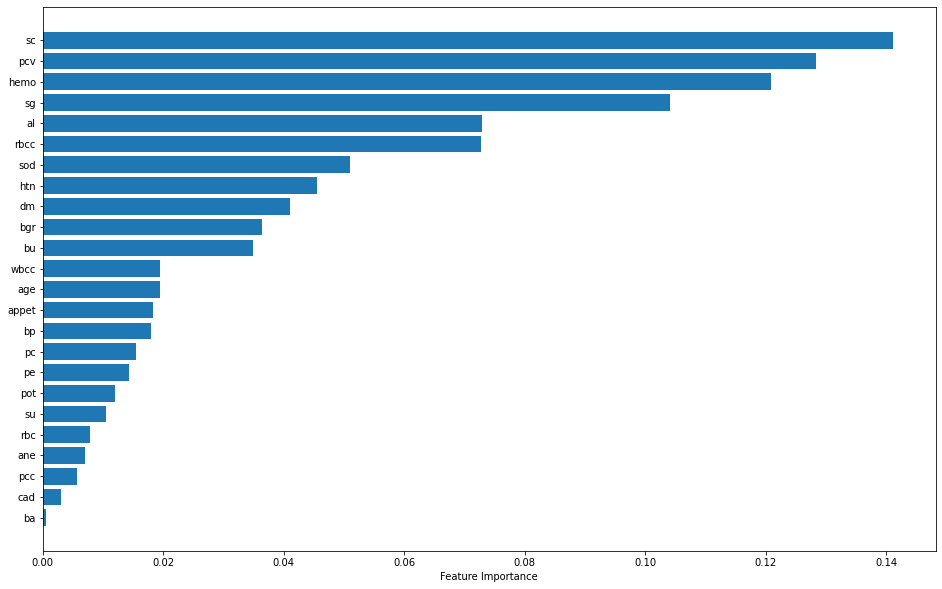

In [ ]:
sort = model.best_estimator_.feature_importances_.argsort()
plt.rcParams["figure.figsize"] = (16, 10)
plt.barh( df.columns[sort], model.best_estimator_.feature_importances_[sort])
plt.xlabel("Feature Importance")

## GAussianProcessClassifier

In [ ]:
clf = GaussianProcessClassifier()
grid = {'kernel': [1.0 * RBF(1), 1.0 * RBF(2), 1.0 * RBF(5)]}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 2, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


({'kernel': 1**2 * RBF(length_scale=1)}, 1.0, 1.0)

## DecisionTreeClassifier

In [ ]:
clf =  DecisionTreeClassifier()
grid = {'max_depth': [2, 3, 5, 10, 15, 20],
        'max_features':['auto', 'sqrt', 'log2']}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 2, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


({'max_depth': 20, 'max_features': 'log2'}, 1.0, 0.975)

Text(0.5, 0, 'Feature Importance')

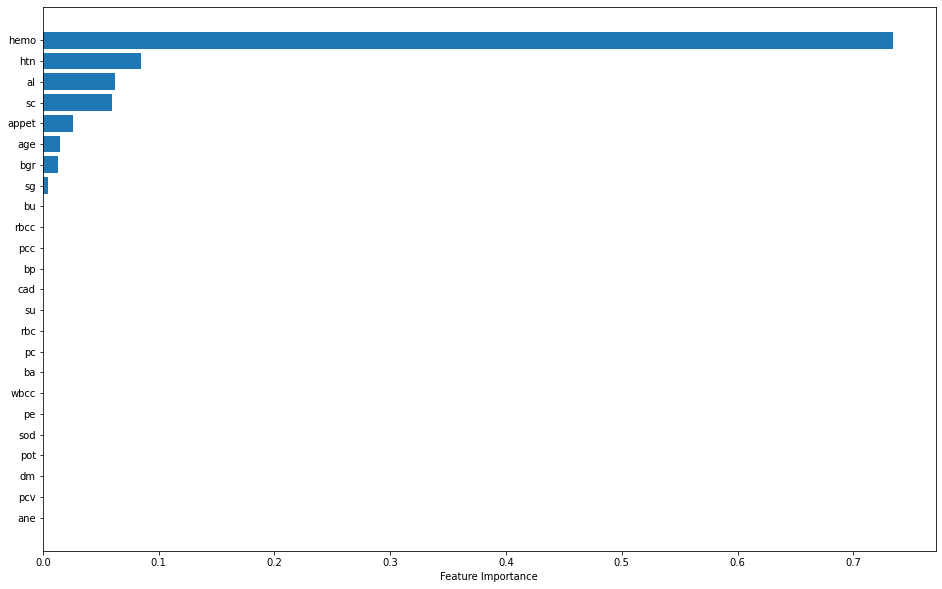

In [ ]:
sort = model.best_estimator_.feature_importances_.argsort()
plt.rcParams["figure.figsize"] = (16, 10)
plt.barh( df.columns[sort], model.best_estimator_.feature_importances_[sort])
plt.xlabel("Feature Importance")

## MLPClassifier

In [ ]:
clf = MLPClassifier(alpha=0.1, max_iter=500)
grid = {'alpha': [0.0001, 0.01, 0.1],
        'hidden_layer_sizes':[ (100,), (500,)],}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 2, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


({'alpha': 0.0001, 'hidden_layer_sizes': (100,)}, 0.996875, 0.9875)

## AdaBoost

In [ ]:
clf = AdaBoostClassifier()
grid = {'n_estimators': [50,100, 500],
        'learning_rate':[0.1, 1, 10]}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 2, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'learning_rate': 0.1, 'n_estimators': 50}, 1.0, 0.9875)

Text(0.5, 0, 'Feature Importance')

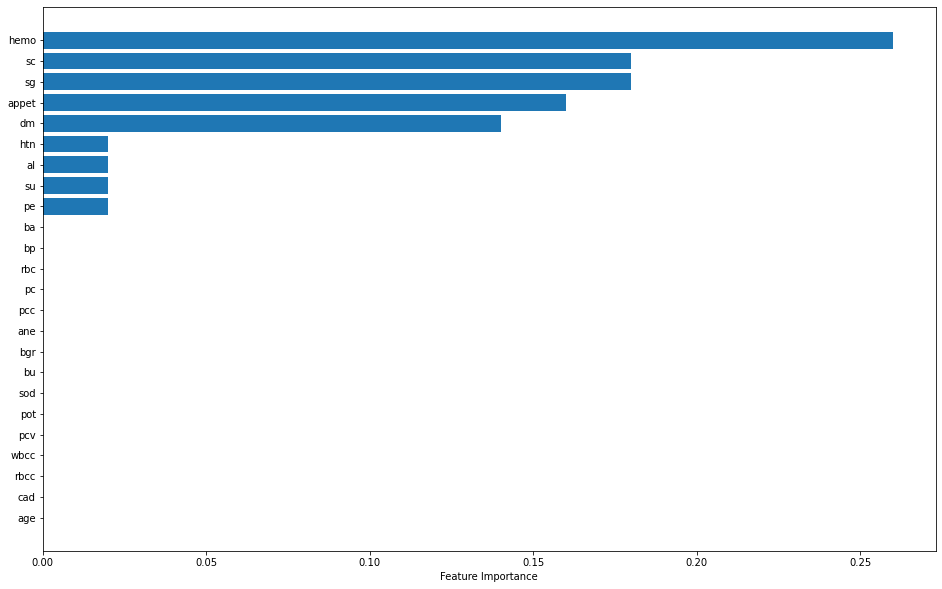

In [ ]:
sort = model.best_estimator_.feature_importances_.argsort()
plt.rcParams["figure.figsize"] = (16, 10)
plt.barh( df.columns[sort], model.best_estimator_.feature_importances_[sort])
plt.xlabel("Feature Importance")

## GAussianNB

In [ ]:
clf = GaussianNB()
grid = {'var_smoothing': [1e-3, 1e-6, 1e-9, 1e-12]}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 2, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


({'var_smoothing': 1e-06}, 0.96875, 0.95)

## GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier()
grid = {'max_depth': [2, 3, 5, 10, 15, 20],
        'n_estimators': [50, 100,],
        'learning_rate': [0.1, 1, 10]}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 2, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 1.0, 1.0)

Text(0.5, 0, 'Feature Importance')

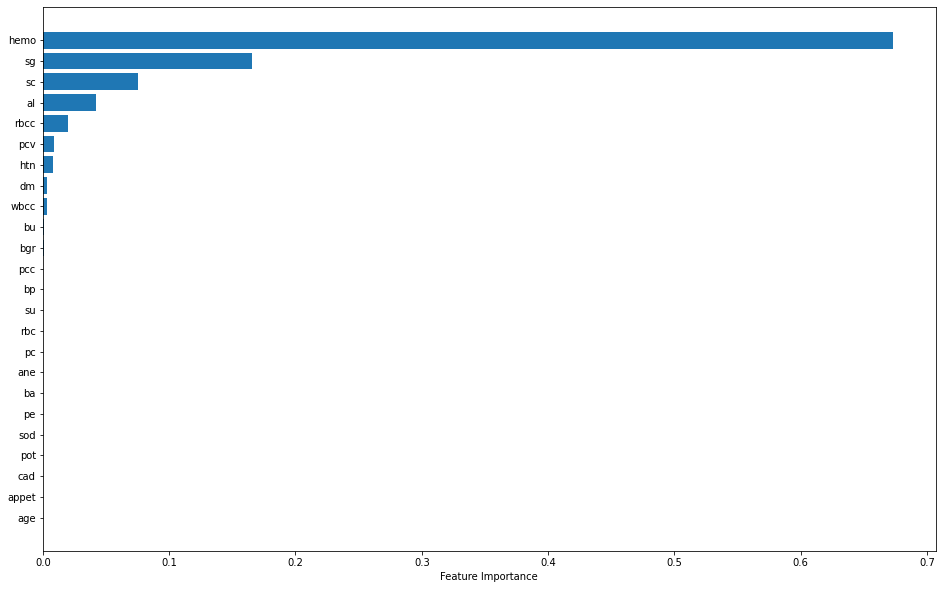

In [ ]:
sort = model.best_estimator_.feature_importances_.argsort()
plt.rcParams["figure.figsize"] = (16, 10)
plt.barh( df.columns[sort], model.best_estimator_.feature_importances_[sort])
plt.xlabel("Feature Importance")

## XGBClassifier

In [ ]:
clf = XGBClassifier()
grid = {'max_depth': [2, 3, 5, 10, 15, 20],
        'n_estimators': [50, 100,],
        'learning_rate': [0.1, 1, 10]}
model = GridSearchCV(estimator = clf, param_grid = grid, cv = 5, verbose = 2, n_jobs = -1)
model.fit(X_train, y_train)
model.best_params_, model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 0.996875, 1.0)

Text(0.5, 0, 'Feature Importance')

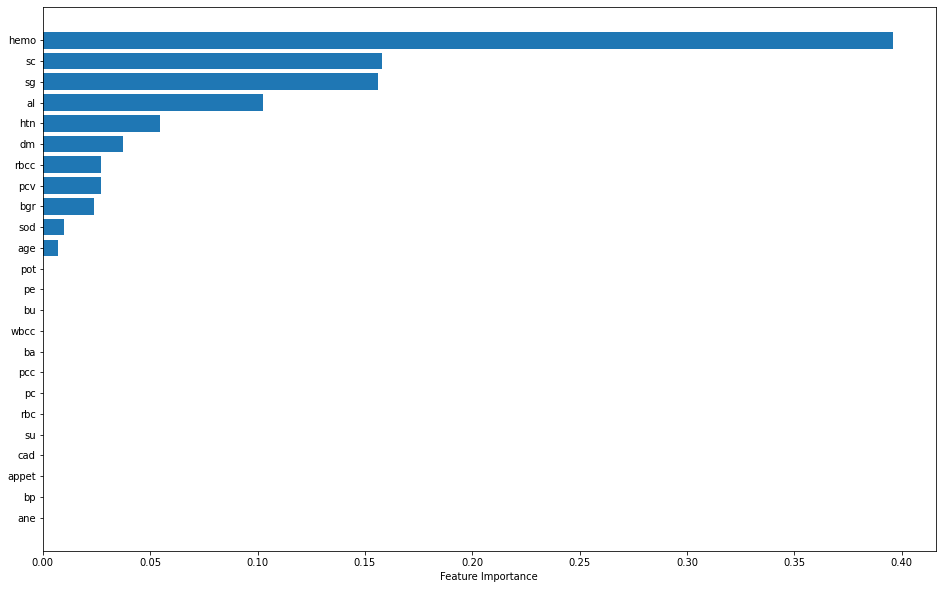

In [ ]:
sort = model.best_estimator_.feature_importances_.argsort()
plt.rcParams["figure.figsize"] = (16, 10)
plt.barh( df.columns[sort], model.best_estimator_.feature_importances_[sort])
plt.xlabel("Feature Importance")

# Result Analysis

## PCA

In [23]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

fig = px.scatter(X, x=0, y=1, color=df['class'], color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

In [25]:
# Stratified Random split with test size 20%
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2)
split.get_n_splits(X, y)
train_idx, test_idx = next(split.split(X, y))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
X_train.shape, X_test.shape

((320, 2), (80, 2))

## Model Comparison

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpc.py:472: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



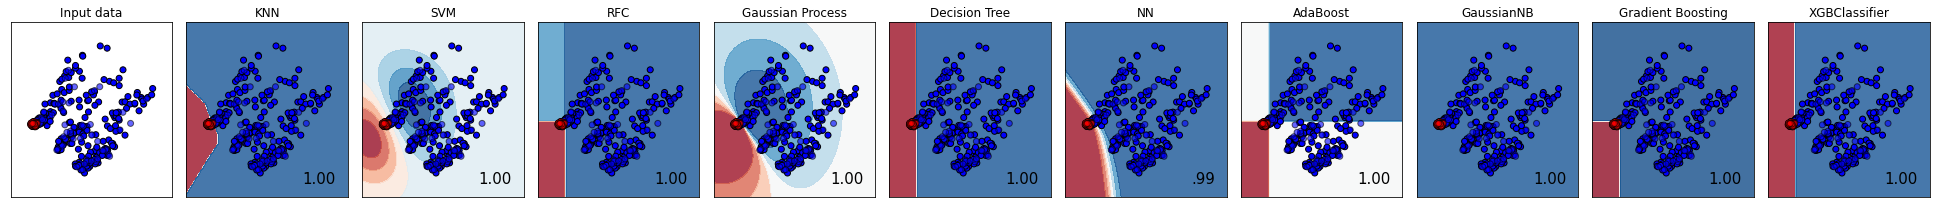

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "KNN",
    "SVM",
    "RFC",
    "Gaussian Process",
    "Decision Tree",
    "NN",
    "AdaBoost",
    "GaussianNB",
    "Gradient Boosting",
    "XGBClassifier"    
]

classifiers = [
    KNeighborsClassifier(leaf_size = 1, n_neighbors = 1),
    SVC(kernel="rbf", C=20, gamma = 'scale'),
    RandomForestClassifier(max_depth=3, max_features=2, ccp_alpha = 0),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10, max_features='log2'),
    MLPClassifier(alpha=0.0001, hidden_layer_sizes = (500,)),
    AdaBoostClassifier(learning_rate=1, n_estimators=500),
    GaussianNB(),
    GradientBoostingClassifier(learning_rate=0.1, max_depth = 2, n_estimators = 50), 
    XGBClassifier(learning_rate=0.1, max_depth = 2, n_estimators = 50)
]


figure = plt.figure(figsize=(27, 3))
i = 1

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot the training points
    ax.scatter(X[train_idx, 0], X[train_idx, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X[test_idx, 0],
        X[test_idx, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(
        xx.max() - 0.3,
        yy.min() + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    

plt.tight_layout()
plt.show()